# 연습문제 1

In [3]:
!pip3 install requests
!pip3 install beautifulsoup4
#크롤링 URL : http://www.paullab.co.kr/stock.html

In [5]:
import requests
from bs4 import BeautifulSoup

response = requests.get('http://www.paullab.co.kr/stock.html')

response.encoding = 'utf-8'
html = response.text

soup = BeautifulSoup(html, 'html.parser')

In [12]:
soup.select('.main')[2]
soup.select('.main')[3]
soup.select('.main')[4]
soup.select('.main')[5]

<div class="main">
<h2 id="제주코딩베이스캠프학원">제주코딩베이스캠프 학원</h2>
<h3><span style="color: salmon">일별</span> 시세</h3>
<table class="table table-hover">
<tbody>
<tr>
<th scope="col">날짜</th>
<th scope="col">종가</th>
<th scope="col">전일비</th>
<th scope="col">시가</th>
<th scope="col">고가</th>
<th scope="col">저가</th>
<th scope="col">거래량</th>
</tr>
<tr>
<td align="center "><span class="date">2019.10.23</span></td>
<td class="num"><span>2,600</span></td>
<td class="num">
<img height="6 " src="ico_up.gif " style="margin-right:4px; " width="7 "/><span>
                            600
                        </span>
</td>
<td class="num"><span>2,055</span></td>
<td class="num"><span>2,600</span></td>
<td class="num"><span>2,020</span></td>
<td class="num"><span>2,203,110</span></td>
</tr>
<tr>
<td align="center"><span class="date">2019.10.22</span></td>
<td class="num"><span>2,000</span></td>
<td class="num">
<img alt="상승" height="6" src="ico_up.gif" style="margin-right:4px;" width="7"/><span>
               

In [24]:
그룹사별일일시가 = soup.select('.main')[2:6]
오늘종가 = []
오늘시가총액 = []

for i in 그룹사별일일시가:
    오늘종가.append(int(i.select('.table > tbody > tr')[1].select('td')[1].select('td > span')[0].text.replace(',','')))

In [29]:
오늘시가총액 = [format(i * 10000, ',') for i in 오늘종가]
오늘시가총액

['66,500,000', '313,000,000', '132,500,000', '26,000,000']

In [31]:
오늘시가총액 = [i * 10000 for i in 오늘종가]
전그룹사시가총액 = format(sum(오늘시가총액), ',')
전그룹사시가총액

'538,000,000'

# 연습문제 2

In [32]:
그룹사별일일시가 = soup.select('.main')[2:6]
오늘종가 = []
오늘시가총액 = []

for j in range(1, len(soup.select('.main')[2].select('.table > tbody > tr'))):
    오늘종가 = []
    for i in 그룹사별일일시가:
        오늘종가.append(int(i.select('.table > tbody > tr')[j].select('td')[1].select('td > span')[0].text.replace(',','')))
    오늘시가총액.append(sum(오늘종가))
    
오늘시가총액

[53800,
 53180,
 53615,
 52305,
 49035,
 48755,
 46970,
 46140,
 45900,
 45765,
 44000,
 43210,
 43830,
 44310,
 44850,
 44370,
 43935,
 44180,
 44410,
 46245]

In [34]:
날짜 = soup.select('.main')[2].select('.table > tbody > tr > td > .date')
date = []
for i in 날짜:
    date.append(i.text)
date

['2019.10.23',
 '2019.10.22',
 '2019.10.21',
 '2019.10.18',
 '2019.10.17',
 '2019.10.16',
 '2019.10.15',
 '2019.10.14',
 '2019.10.11',
 '2019.10.10',
 '2019.10.08',
 '2019.10.07',
 '2019.10.04',
 '2019.10.02',
 '2019.10.01',
 '2019.09.30',
 '2019.09.27',
 '2019.09.26',
 '2019.09.25',
 '2019.09.24']

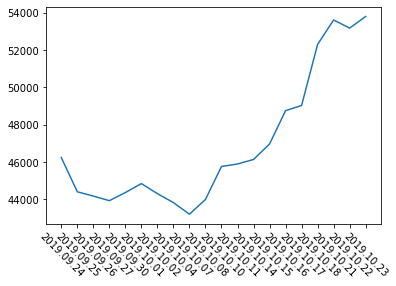

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(date[::-1], 오늘시가총액[::-1])
plt.xticks(rotation = -45)
plt.show()